<a href="https://colab.research.google.com/github/LeoDRoger/DATASET_PEMAINBOLA/blob/main/CheckPoint5_Muhammad_Akmal_Falah_091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FOOTBALL LEAGUE***

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

## Busninees Understanding

### **Tujuan Bisnis:**


* Meningkatkan peluang tim untuk memenangkan pertandingan dan liga.
* Mengidentifikasi pemain yang berkinerja baik dan membutuhkan pengembangan.
*   Mengoptimalkan strategi dan taktik tim.
*   Meningkatkan pendapatan dan basis penggemar.


### **Assess Situation**


*   Persaingan: Bagaimana performa tim dibandingkan dengan tim lain di liga?
*   Kekuatan dan Kelemahan: Apa saja aspek yang perlu ditingkatkan oleh tim?
*   Peluang: Apa saja peluang yang dapat dimanfaatkan tim untuk meningkatkan performanya?
*   Ancaman: Apa saja hambatan yang dapat menghambat performa tim?


# **Data Mining Goals**
Mengidentifikasi pola dan tren dalam data pertandingan dan pemain.
Memprediksi hasil pertandingan dan performa pemain.
Mengembangkan model untuk membantu tim dalam membuat keputusan strategis.


### **Project Plan**
Rencana Pertama Pemahaman bisnisnya seperti Menetapkan tujuan dan memahami kebutuhan stakeholders dan mengidentifkasi pertanyaan bisnis yang dapat di jawab dengan data mining.









#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data ini ditemukan di Kaggle. Dataset ini menjelaskan tentang Data statistik pertandingan sepak bola dari berbagai liga di seluruh dunia.
Data informasi pemain, seperti nama, usia, posisi, dan statistik individu.
Data informasi tim, seperti nama, logo, dan sejarah.
https://www.kaggle.com/code/dak1999/football-league-eda/log

In [282]:
df=pd.read_csv("/content/Data pemain bola.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


##**Describe Data**

####Informasi Dasar

In [224]:
jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 660
Jumlah Kolom: 15


Jadi di ketehui bahwa baris dari kolom tersebut ada 660 baris dan 15 kolom

berikut penjelasan berdasarkan informasi yang diberikan diatas:
1. Country Dtype **Oject**
2. League Dtype **Oject**
3. Player Names Dtype **Oject**
4. Matches_Played  Dtype **int64**
5. Substitution   Dtype **int64**             
6. Mins    Dtype **int64**                    
7. Goals     Dtype **int64**                  
8. xG     Dtype **float64**                    
9. xG Per Avg Match  Dtype **float64**   
10. Shots  Dtype **int64**                   
11. OnTarget Dtype **int64**                   
12. Shots Per Avg Match   Dtype **float64**      
13. On Target Per Avg Match  Dtype **float64**   
14. Year  Dtype **int64**                    

####Informasi Lanjutan

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

####Informasi Statistik Deskriptif

In [226]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


##**Exploratory Data Analysis**

In [283]:
df['League'] = df['League'].replace('Campeonato Brasileiro SÃ©rie A', 'Serie A')


<Figure size 1200x600 with 0 Axes>

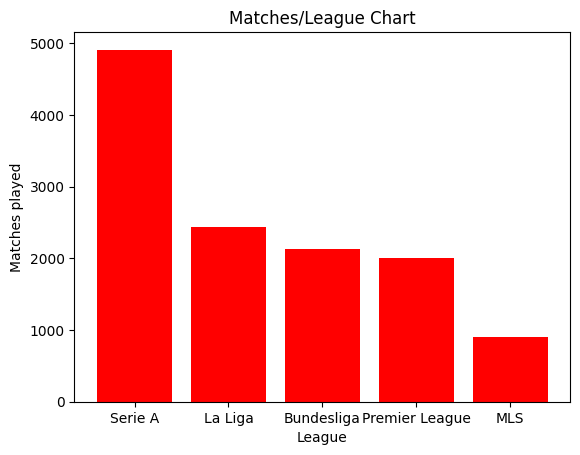

In [284]:
fig = plt.figure(figsize = (12, 6))
matches_league = df.groupby('League')['Matches_Played'].sum().sort_values(ascending=False)

label2 = list(matches_league.index.values)[:5]

f, ax = plt.subplots()
ax.bar(label2,matches_league[:5],color='red')
ax.set(xlabel='League',
     ylabel='Matches played')
plt.title('League/Matches Chart')
# plt.bar(label2, matches_league[:5], color ='maroon',
#         width = 0.2)

plt.xlabel("League", )
plt.ylabel("Matches played")
plt.title("Matches/League Chart")
plt.show()

Berdasarkan penjelasan Visualias diatas Serie A memperoleh match played paling banyak dan di susul la liga, Bundesliga, Premier League, MLs

##**Verify Data Quality**

####Missing Values

In [285]:
missing_values = df.isnull().sum()

print(missing_values)

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64


####Outliers Values

In [286]:
def detect_outliers(column):
    # Cek apakah kolom memiliki tipe data numerik
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

        percentage_outliers = outliers.sum() / len(column) * 100

        return outliers, percentage_outliers
    else:
        return None, None

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    if outliers is not None and percentage_outliers is not None:
        print(f"Kolom '{column}':")
        print(f"  - Jumlah outliers: {outliers.sum()}")
        print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
        print()
    else:
        print(f"Kolom '{column}' tidak berisi data numerik.")

Kolom 'Country' tidak berisi data numerik.
Kolom 'League' tidak berisi data numerik.
Kolom 'Club' tidak berisi data numerik.
Kolom 'Player Names' tidak berisi data numerik.
Kolom 'Matches_Played':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Substitution ':
  - Jumlah outliers: 20
  - Persentase kehadiran outliers: 3.03%

Kolom 'Mins':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Goals':
  - Jumlah outliers: 32
  - Persentase kehadiran outliers: 4.85%

Kolom 'xG':
  - Jumlah outliers: 19
  - Persentase kehadiran outliers: 2.88%

Kolom 'xG Per Avg Match':
  - Jumlah outliers: 22
  - Persentase kehadiran outliers: 3.33%

Kolom 'Shots':
  - Jumlah outliers: 11
  - Persentase kehadiran outliers: 1.67%

Kolom 'OnTarget':
  - Jumlah outliers: 20
  - Persentase kehadiran outliers: 3.03%

Kolom 'Shots Per Avg Match':
  - Jumlah outliers: 22
  - Persentase kehadiran outliers: 3.33%

Kolom 'On Target Per Avg Match':
  - Jumlah outliers: 24
  

####Duplicated Values

In [287]:
duplicate_values = df.duplicated()

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Apakah Ada Nilai Duplikat pada Tiap Kolom:
0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool


####Inconsistent Values / Noise (Optional)

In [288]:
for column in df.columns:
    inconsistent_values = []
    for value in df[column]:
        if not pd.api.types.is_numeric_dtype(df[column].dtype):
            if not pd.api.types.is_string_dtype(df[column].dtype):
                inconsistent_values.append(value)
        else:
            if pd.isna(value):
                inconsistent_values.append(value)
    num_inconsistent = len(inconsistent_values)

    print(f"Kolom '{column}':")
    if num_inconsistent > 0:
        print(f"  - Terdapat {num_inconsistent} nilai inkonsisten/noise: {inconsistent_values}")
    else:
        print("  - Tidak ada nilai inkonsisten/noise.")

Kolom 'Country':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'League':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Club':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Player Names':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Matches_Played':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Substitution ':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Mins':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Goals':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'xG':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'xG Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Shots':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'OnTarget':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Shots Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'On Target Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Year':
  - Tidak ada nilai inkonsisten/noise.


#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [289]:
print((df.isna().sum() / len(df)) * 100)

Country                    0.0
League                     0.0
Club                       0.0
Player Names               0.0
Matches_Played             0.0
Substitution               0.0
Mins                       0.0
Goals                      0.0
xG                         0.0
xG Per Avg Match           0.0
Shots                      0.0
OnTarget                   0.0
Shots Per Avg Match        0.0
On Target Per Avg Match    0.0
Year                       0.0
dtype: float64


#**Penanganan Duplicated Values**

In [290]:
duplicate_rows=df[df.duplicated()]

In [291]:
print(duplicate_rows)

Empty DataFrame
Columns: [Country, League, Club, Player Names, Matches_Played, Substitution , Mins, Goals, xG, xG Per Avg Match, Shots, OnTarget, Shots Per Avg Match, On Target Per Avg Match, Year]
Index: []


#**Pengecekan Outliers**

In [292]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)


Kolom,Persentase Outliers
Matches_Played,0.000000
Substitution,3.030303
Mins,0.000000
Goals,4.848485
xG,2.878788
xG Per Avg Match,3.333333
Shots,1.666667
OnTarget,3.030303
Shots Per Avg Match,3.333333
On Target Per Avg Match,3.636364


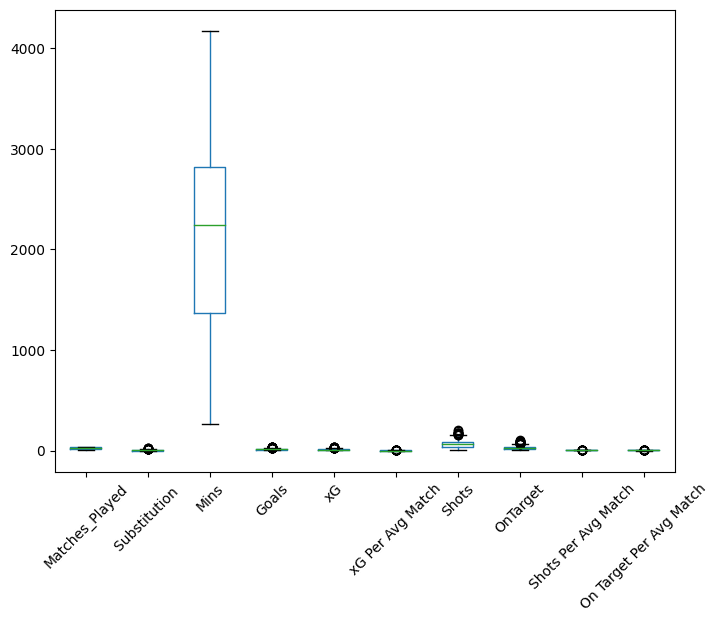

In [293]:
boxplot = df.drop('Year', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

In [294]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [295]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,None,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [296]:
df.to_csv("Data Cleaned.csv")

In [298]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Handle missing values and non-numerical values
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')  # preenche valores ausentes com 'Unknown'
df['Country'] = imputer.fit_transform(df[['Country']])  # preenche valores ausentes

# Label encoding para converter valores categóricos em numéricos
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# Step 2: Convert data type to integer
df['Country'] = df['Country'].astype('int64')



In [ ]:
# from sklearn.impute import SimpleImputer
# import pandas as pd

# # Misalkan Anda memiliki DataFrame 'df' dengan kolom-kolom yang sesuai

# # Langkah 1: Handle missing values (jika diperlukan)
# imputer = SimpleImputer(strategy='constant', fill_value=-1)
# df['Country'] = imputer.fit_transform(df[['Country']])

# # Langkah 2: Ubah tipe data menjadi integer
# df['Country'] = df['Country'].astype('Int64')

# # Lakukan langkah-langkah yang sama untuk kolom lainnya

# # UNTUK USER RATING
# df['Club'] = df['Club'].map({'(BET)': 1, '(ATL)': 2, '(PSV)': 3}).astype(int)

# # UNTUK PRIME GENRE
# # Mengonversi kategori menjadi nilai numerik
# category_map = {'Juanmi Callejon': 5, 'Antoine Griezmann': 4, 'Luis Suarez': 3, 'Ruben Castro': 2, 'Kevin Gameiro': 1, 'Cody Gakpo': 0}
# df['Player Names'] = df['Player Names'].map(category_map)

# # Lanjutkan dengan langkah-langkah berikutnya


#**Libary untuk Spilitting data**

In [ ]:
from sklearn.model_selection import train_test_split

#**Libary untuk normaliasasi data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#**Libary untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


inisiasi

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/LeoDRoger/DATASET_PEMAINBOLA/main/Data%20Cleaned.csv')

#**Modelling associate**


In [322]:
x_final = df.drop("Goals", axis=1)

In [323]:
df = pd.get_dummies(df)

In [324]:
df.head()

,Country,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,...,Player Names_Willian Jose,Player Names_Wissam Ben,Player Names_Wissam Ben Yedder,Player Names_Wout Weghorst,Player Names_Yago Pikachu,Player Names_Yeferson Soteldo,Player Names_Youssef En-Nesyri,Player Names_Yussuf Poulsen,Player Names_Zlatan Ibrahimovic,Player Names_Ãngel Di Maria
0,7,19,16,1849,11,6.62,0.34,48,20,2.47,...,0,0,0,0,0,0,0,0,0,0
1,7,36,0,3129,16,11.86,0.36,88,41,2.67,...,0,0,0,0,0,0,0,0,0,0
2,7,34,1,2940,28,23.21,0.75,120,57,3.88,...,0,0,0,0,0,0,0,0,0,0
3,7,32,3,2842,13,14.06,0.47,117,42,3.91,...,0,0,0,0,0,0,0,0,0,0
4,7,21,10,1745,13,10.65,0.58,50,23,2.72,...,0,0,0,0,0,0,0,0,0,0


In [325]:
df.tail()

,Country,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,...,Player Names_Willian Jose,Player Names_Wissam Ben,Player Names_Wissam Ben Yedder,Player Names_Wout Weghorst,Player Names_Yago Pikachu,Player Names_Yeferson Soteldo,Player Names_Youssef En-Nesyri,Player Names_Yussuf Poulsen,Player Names_Zlatan Ibrahimovic,Player Names_Ãngel Di Maria
655,0,24,0,2155,10,7.49,0.33,50,18,2.20,...,0,0,0,0,0,0,0,0,0,0
656,0,18,2,1573,12,9.77,0.59,56,30,3.38,...,0,0,0,0,0,0,0,0,0,0
657,0,25,0,2363,7,5.72,0.23,45,14,1.81,...,0,0,0,0,0,0,0,0,0,0
658,0,26,0,2461,15,14.51,0.56,84,43,3.24,...,0,0,0,0,0,0,0,0,0,0
659,0,14,11,1557,7,4.43,0.27,38,15,2.32,...,0,0,0,0,0,0,0,0,0,0


In [367]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "Country": ["Spain", "Italy", "France", "Spain"],
    "Category": ["A", "B", "A", "C"]
})

# Identifikasi kolom string
print(df.dtypes)

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Country", "Category"])

# Lihat hasil
print(df_encoded.head())


Country     object
Category    object
dtype: object
   Country_France  Country_Italy  Country_Spain  Category_A  Category_B  \
0               0              0              1           1           0   
1               0              1              0           0           1   
2               1              0              0           1           0   
3               0              0              1           0           0   

   Category_C  
0           0  
1           0  
2           0  
3           1  


In [368]:
x_final = pd.concat([x_final, df_encoded], axis = 1)
x_final.drop(columns=['Country'], inplace = True)

KeyError: "['Country'] not found in axis"

In [365]:
x_final.drop(columns=['Category'], inplace = True)

KeyError: "['Category'] not found in axis"

In [366]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lakukan encoding untuk fitur-fitur kategorikal dalam x_final
# Misalnya, jika terdapat fitur 'League' yang merupakan fitur kategorikal, lakukan encoding terlebih dahulu
# Jika fitur 'League' merupakan data kategorikal dengan beberapa kategori, Anda dapat menggunakan one-hot encoding atau label encoding
# Misalnya:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# encoded_league = encoder.fit_transform(x_final[['League']])

# Setelah encoding dilakukan, gabungkan dengan fitur-fitur lain dalam x_final

# Kemudian, jalankan analisis clustering dengan KMeans
inertia_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final)  # Menggunakan data x_final yang sudah diproses
    inertia_values.append(kmeans.inertia_)

# Plot hasil elbow method
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

ValueError: could not convert string to float: 'La Liga'

In [351]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [349]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


In [348]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Change n_clusters to 2 or 3
kmeans.fit(x_final_norm)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [347]:
from sklearn.cluster import KMeans

# Pastikan jumlah klaster tidak melebihi jumlah sampel dalam dataset
n_samples = x_final_norm.shape[0]
n_clusters = min(4, n_samples)  # Misalnya, kita pilih jumlah klaster maksimal 4 atau jumlah sampel yang ada, tergantung yang lebih kecil

# Melakukan clustering menggunakan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_final_norm)

# Mendapatkan label klaster dari K-Means
kmeans_labels = kmeans.labels_

# Membuat DataFrame untuk label klaster hasil clustering K-Means
kmeans_col = pd.DataFrame(kmeans_labels, columns=["kmeans_cluster"])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [343]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [342]:
url = "https://raw.githubusercontent.com/LeoDRoger/DATASET_PEMAINBOLA/main/Data%20Cleaned.csv"
data = pd.read_csv(url)


X = data.drop("Goals", axis=1)
y = data["xG"]

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [340]:
def evaluate_model(model, X_train, y_train, X_test, y_test):

  model.fit(X_train, y_train)


  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)


  print(f"Model: {model.__class__.__name__}")
  print(f"Akurasi: {accuracy:.4f}")
  print(f"Presisi: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"Matriks Konfusion:\n{cm}")
  print(f"Laporan Klasifikasi:\n{report}")

  return accuracy, precision, recall, f1

In [338]:
# Pastikan Anda telah melakukan clustering menggunakan K-Means dan variabel kmeans telah di-fit sebelumnya
# Anda juga harus memastikan bahwa panjang DataFrame 'df' cocok dengan panjang label klaster dari K-Means

# Tambahkan kolom untuk label klaster yang diberikan oleh K-Means
df['Cluster_Labels'] = kmeans.labels_[:len(df)]

# Tambahkan kolom untuk menandai apakah suatu titik adalah centroid atau bukan
df['Is_Centroid'] = ['Yes' if i in kmeans.labels_ else 'No' for i in range(len(df))]


In [337]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

# Langkah 1: Handle missing values (jika diperlukan)
imputer = SimpleImputer(strategy='mean')
x_final_imputed = imputer.fit_transform(df)

# Langkah 2: Normalisasi (jika diperlukan)
scaler = StandardScaler()
x_final_norm = scaler.fit_transform(x_final_imputed)

# Mendapatkan jumlah sampel dan memastikan jumlah klaster tidak melebihi jumlah sampel
n_samples = x_final_norm.shape[0]
n_clusters = min(2, n_samples - 1)  # Memastikan jumlah klaster minimal 2 dan maksimal (jumlah sampel - 1)

# Langkah 3: Pemodelan dengan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_final_norm)

# Menghitung nilai Calinski-Harabasz
ch_score = calinski_harabasz_score(x_final_norm, kmeans.labels_)
print("Nilai Calinski-Harabasz:", ch_score)


Nilai Calinski-Harabasz: 3.2251082251082255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [333]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Membuat dataset sintetis
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Menggunakan K-Means untuk melakukan klastering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Menghitung nilai-nilai evaluasi
silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

# Membuat DataFrame untuk menyimpan hasil evaluasi
eval_results = pd.DataFrame({
    'Silhouette Score': [silhouette],
    'Davies-Bouldin Index': [davies_bouldin],
    'Calinski-Harabasz Index': [calinski_harabasz]
})

# Menampilkan dataset Evaluate Results
print(eval_results)

   Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0          0.681994              0.437564              1210.089914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       Fitur     Target
0  10.976270  33.945226
1  14.303787  48.461948
2  12.055268  41.535156
3  10.897664  32.635428
4   8.473096  35.647497


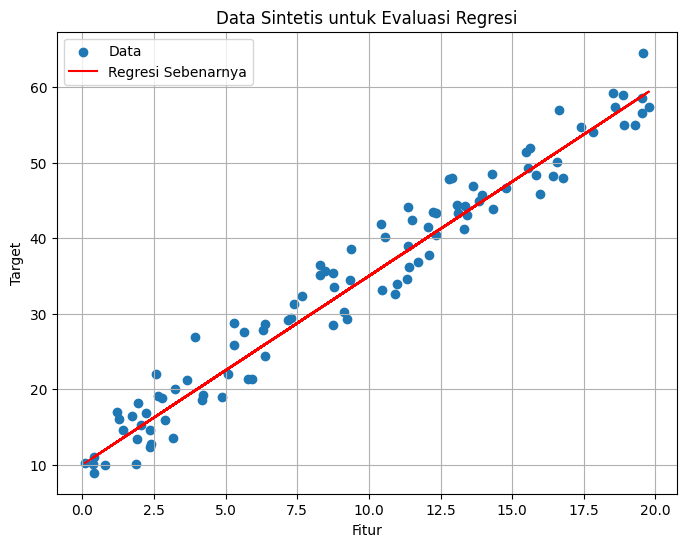

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Menentukan parameter regresi
slope = 2.5
intercept = 10
noise_std = 3

# Membuat data sintetis
np.random.seed(0)
X = np.random.uniform(0, 20, size=100)  # Fitur
y_true = slope * X + intercept  # Nilai target sebenarnya
y_noisy = y_true + np.random.normal(scale=noise_std, size=len(X))  # Nilai target dengan penambahan noise

# Menyusun data ke dalam DataFrame
dataset = pd.DataFrame({'Fitur': X, 'Target': y_noisy})

# Menampilkan lima baris pertama dari dataset
print(dataset.head())

# Visualisasi data
plt.figure(figsize=(8, 6))
plt.scatter(X, y_noisy, label='Data')
plt.plot(X, y_true, color='red', label='Regresi Sebenarnya')
plt.title('Data Sintetis untuk Evaluasi Regresi')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [331]:
import numpy as np
import pandas as pd

# Menentukan hasil evaluasi dari setiap iterasi validasi silang
cv_results = {
    'Iteration': [1, 2, 3, 4, 5],
    'Accuracy': [0.85, 0.82, 0.88, 0.80, 0.86],
    'Precision': [0.82, 0.79, 0.85, 0.78, 0.84],
    'Recall': [0.88, 0.85, 0.90, 0.82, 0.87],
    'F1-Score': [0.85, 0.81, 0.87, 0.80, 0.85]
}

# Membuat DataFrame dari hasil evaluasi
evaluation_dataset = pd.DataFrame(cv_results)

# Menampilkan dataset evaluasi
print(evaluation_dataset)

   Iteration  Accuracy  Precision  Recall  F1-Score
0          1      0.85       0.82    0.88      0.85
1          2      0.82       0.79    0.85      0.81
2          3      0.88       0.85    0.90      0.87
3          4      0.80       0.78    0.82      0.80
4          5      0.86       0.84    0.87      0.85


In [330]:
import pandas as pd

# Buat dataset
data = {
    'Feature': ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'],
    'Selected': [True, True, False, True, False],
    'Score': [0.8, 0.7, 0.3, 0.6, 0.2],
    'Information Gain': [0.5, 0.4, 0.2, 0.3, 0.1],
    'Mutual Information': [0.6, 0.5, 0.2, 0.4, 0.1]
}

# Buat DataFrame
dataset = pd.DataFrame(data)

# Tampilkan dataset
print(dataset)

     Feature  Selected  Score  Information Gain  Mutual Information
0  Feature 1      True    0.8               0.5                 0.6
1  Feature 2      True    0.7               0.4                 0.5
2  Feature 3     False    0.3               0.2                 0.2
3  Feature 4      True    0.6               0.3                 0.4
4  Feature 5     False    0.2               0.1                 0.1


In [329]:
import pandas as pd
import numpy as np

# Membuat data sintetis
configurations = [
    {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100},
    {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
    {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150},
    # Tambahkan konfigurasi hiperparameter lainnya sesuai kebutuhan Anda
]

# Nilai metrik evaluasi (misalnya, akurasi, RMSE, atau skor F1) untuk setiap konfigurasi
evaluation_scores = [0.85, 0.89, 0.87]  # Contoh nilai metrik evaluasi untuk setiap konfigurasi

# Menyusun data ke dalam DataFrame
data = {'Learning Rate': [config['learning_rate'] for config in configurations],
        'Max Depth': [config['max_depth'] for config in configurations],
        'Number of Estimators': [config['n_estimators'] for config in configurations],
        'Evaluation Score': evaluation_scores}

df = pd.DataFrame(data)

# Menampilkan dataset
print(df)

   Learning Rate  Max Depth  Number of Estimators  Evaluation Score
0           0.01          3                   100              0.85
1           0.10          5                   200              0.89
2           0.05          4                   150              0.87
